# Saarthak Marathe | ME17B162

# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [56]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [57]:
df = pd.read_csv("grades.csv")

In [63]:
# write a function to do Label encoding
def label_encoding( column ):
    col = list(column.unique())
    col.sort()
    labels = [1]*len(col)
    output = [1]*len(column)
    j=2
    for i in range(len(col)-1):
        labels[i] = j
        j+=1
    for i in range(len(column)):
        index = col.index(column[i])
        output[i] = labels[index]
    return output
        
df['labelcol'] = label_encoding(df['Grades'])

In [64]:
df

,Name,Grades,labelcol
0,Nilesh,A,2
1,Jhon,S,1
2,James,C,4
3,Ravi,F,6
4,Sita,S,1
5,Raju,E,5
6,Praful,F,6
7,Ganga,B,3
8,Ram,A,2
9,Rahim,S,1


Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [65]:
df2 = pd.read_csv("color.csv")

Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [66]:
# Answer
color = list(df2['Color'].unique())
n = len(color)
for i in range(len(color)):
    df2[color[i]] = 0
for i in range(len(df2)):
    df2[df2['Color'][i]][i] = 1

In [62]:
df2

,Objects,Color,Green,Red,Blue,Yellow
0,Leaves,Green,1,0,0,0
1,Blood,Red,0,1,0,0
2,Sea,Blue,0,0,1,0
3,Rose,Red,0,1,0,0
4,Sun flower,Yellow,0,0,0,1
5,Apple,Red,0,1,0,0
6,Mango,Yellow,0,0,0,1
7,Banana,Yellow,0,0,0,1


Answer the following for both the data 

- What are the categories in the data? 
    1. **Grades**: Categories decided on the grades with S,A,B,C,D,E,F being the priority order. Label encoding was used
    2. **Object Colors**: Categories based on the color column. One hot encoding was used as there is no prioirty order


- What is the relationship between different categories in the grades column?
    * Each grade is decided on a priority order mentioned above. S being the highest grade and F being the lowest.


- Which encoding to be used Label encoding or one-hot encoding?
    * Label encoding is to be used for grades as there is a priority of grades mentioned.



Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [126]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    m = np.shape(X)[0]
    diff = (X@theta - y)
    diff = diff.reshape(m,)
    theta = theta.reshape(4,)
    J = diff@diff + lamda*(theta@theta)

    return J

In [127]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    m = np.size(y)
    J_history = np.zeros(max_iters)
    count = 0
    y = y.reshape((m,1))
    
    for i in range(max_iters):
        vec = X_appended@theta - y
        #count += 1
        for j,theta_j in enumerate(theta):
            theta[j] = theta_j - (1/m)*(alpha*(vec[:,0]@(X_appended[:,j])) - (alpha*lamda*theta_j))
        #h = np.dot(X_appended,theta)
        #theta = np.argmin(np.dot((y_train - X_train*theta).T, (y_train - X_train*theta)) + lamda*(np.dot(theta.T,theta)))
        #theta = theta - alpha *(1/m)*((X_appended.T @ (h-y)) + lamda * theta)
        J_history[i] = computeCost(X_appended,y,theta,lamda)
    
    count = len(J_history)
    cost = J_history[-1]
    return theta, J_history, count, cost

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [168]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

X_train = data['X_train']
y_train = data['y_train']
X_test = data_test['X_test']
y_test = data_test['y_test']

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

In [169]:
from sklearn.preprocessing import PolynomialFeatures
X_appended = PolynomialFeatures(3).fit_transform(X_train.reshape(-1,1))
X_sorted = np.sort(X_train)
X_sortednew = PolynomialFeatures(3).fit_transform(X_sorted.reshape(-1,1))

Cost for lamda  0 is: 181.53261876615488
Cost for lamda  100 is: 25599.270964643594
Cost for lamda  10000 is: 3.937388952419662e+108


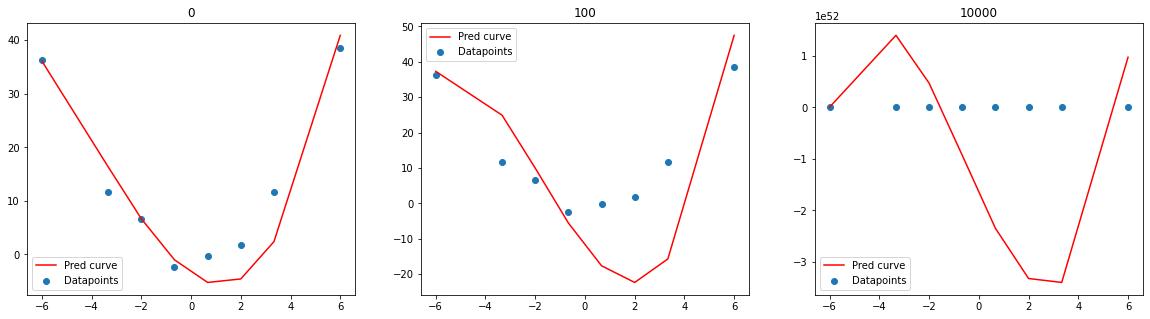

In [177]:
alpha = 0.0001
theta = -4*np.ones((4,1))
lamda_list = [0, 100, 10000]
n = len(lamda_list)

fig = plt.figure(figsize=(20,5))
j=1
for i,lamda in enumerate(lamda_list):
    theta, J_history, count, cost = gradientDescent(X_appended, y_train, theta, alpha, lamda = lamda, max_iters = 1000)

    pred = X_appended@theta
    plot_pred = X_sortednew@theta
    fig.add_subplot(1, 3, j)
    j+=1
    plt.scatter(X_train,y_train, label = 'Datapoints')
    plt.plot(X_sorted,plot_pred, color = 'r', label = 'Pred curve')
    plt.legend(loc='top right')
    plt.title(lamda)
    
    print('Cost for lamda ', lamda, 'is:', cost)
plt.show()

**Write comment how the fit changes as lambda and what is the reason?**
lamda = 0 gives the best result of all. lamda = 100, 10000 start deviating a lot and the bias is too much. This is evident to happen from the theta estimator formula given because as the lamba increases then the cost is higher.

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

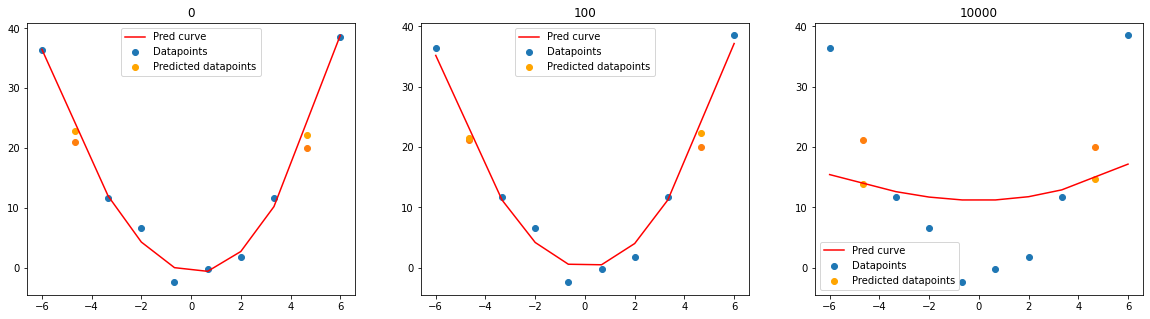

In [193]:
from sklearn.linear_model import Ridge
fig = plt.figure(figsize=(20,5))
j=1
for i,lamda in enumerate(lamda_list):
    rr = Ridge(alpha = lamda)
    rr.fit(X_appended, y_train)
    pred = rr.predict(X_sortednew)
    fig.add_subplot(1, 3, j)
    j+=1
    plt.scatter(X_train,y_train, label = 'Datapoints')
    plt.plot(X_sorted, pred, color = 'r', label = 'Pred curve')

    X_testnew = PolynomialFeatures(3).fit_transform(X_test.reshape(-1,1))
    pred = rr.predict(X_testnew)
    plt.scatter(X_test,y_test)
    plt.scatter(X_test,pred, color = 'orange', label = 'Predicted datapoints')
    plt.title((lamda))
    plt.legend()
plt.show()

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

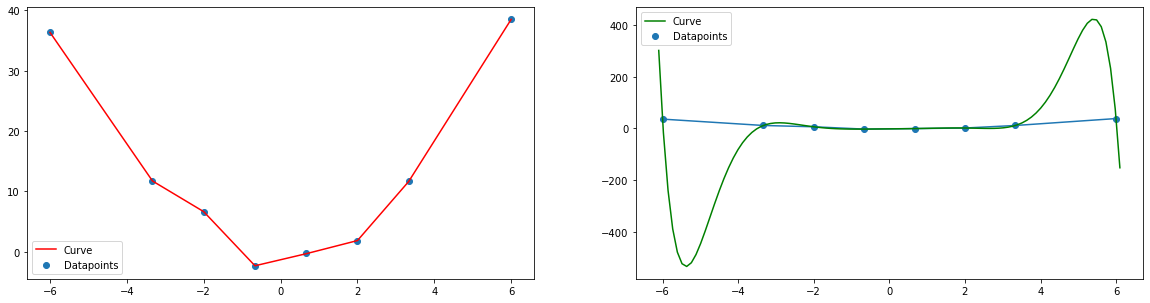

The second curve shows that it overfits the given dataset and its not a good choice


In [195]:
''' Import neccessay packages '''
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

def regression(X,Y,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    X_appended = PolynomialFeatures(degree, include_bias = False).fit_transform(X)
    
    if reg_type == 'ridge':
        reg = Ridge(alpha = alpha).fit(X_appended, Y)
    elif reg_type == 'linear':
        reg = LinearRegression().x
    elif reg_type == 'lasso':
        reg = Lasso(alpha = alpha).fit(X_appended, Y)
        
    Y_hat = reg.predict(X_appended)
    mse = mean_squared_error(Y, Y_hat)
    
    return (Y_hat, mse , reg)

fig = plt.figure(figsize=(20,5))
# Plotting and calling the function
degree = 9
Y_hat, mse, reg = regression(X_train.reshape(-1,1), y_train, reg_type = 'ridge')
x_app = PolynomialFeatures(degree, include_bias = False).fit_transform(X_sorted.reshape(-1,1))
y = reg.predict(x_app)
fig.add_subplot(1, 2, 1)
plt.plot(X_sorted,y, color = 'r', label = 'Curve')
plt.scatter(X_train,y_train, label = 'Datapoints')
plt.legend(loc='top left')

degree = 9
fig.add_subplot(1, 2, 2)
plt.plot(X_sorted,y)
x_line = np.linspace(-6.1,6.1,100).reshape(-1,1) #decided based on the X_sorted data
x_deg = PolynomialFeatures(degree, include_bias = False).fit_transform(x_line)
y_line = reg.predict(x_deg)
plt.plot(x_line,y_line,color = 'green', label = 'Curve')
plt.scatter(X_train,y_train, label = 'Datapoints')
plt.legend(loc='top left')
plt.show()

print('The second curve shows that it overfits the given dataset and its not a good choice')

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

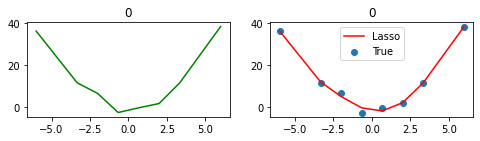

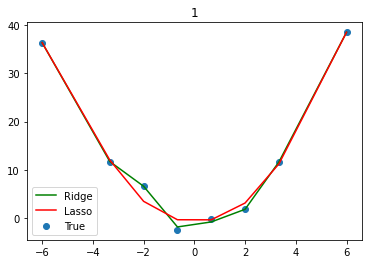

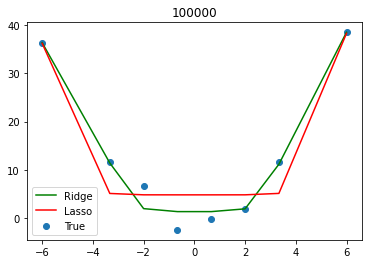

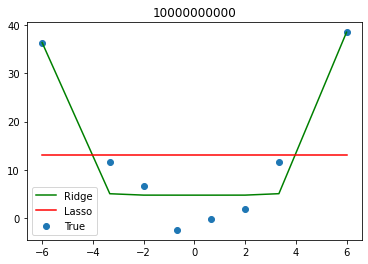

In [200]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge
X_train = np.load("dataWeek4Train.npz")['X_train']
y_train = np.load("dataWeek4Train.npz")['y_train']
X_test = np.load("dataWeek4Test.npz")['X_test']
y_test = np.load("dataWeek4Test.npz")['y_test']

lamdalist = [0,1,10**5, 10**10]

fig = plt.figure(figsize=(8,8))
j=1

for i,lamda in enumerate(lamdalist):
    for reg_type in ['ridge', 'lasso']:
        fig.add_subplot(4, 2, j)
        j+=1
        Y_hat, mse, reg = regression(X_train.reshape(-1,1),y_train,reg_type = reg_type, alpha=lamda)
        x_app = PolynomialFeatures(degree, include_bias = False).fit_transform(X_sorted.reshape(-1,1))
        y_sorted = reg.predict(x_app)
        if reg_type == 'ridge':
            plt.plot(X_sorted,y_sorted, label = 'Ridge', color = 'green')
        elif reg_type == 'lasso':
            plt.plot(X_sorted,y_sorted, label = 'Lasso', color = 'red')
        plt.title((lamda))
    plt.scatter(X_train,y_train, label = 'True')
    plt.legend(loc='top left')
    plt.show()

In [207]:
for i,lamda in enumerate(lamda_list):
    for reg_type in ['ridge', 'lasso']:
        Y_hat, mse, reg = regression(X_train.reshape(-1,1),y_train,reg_type = reg_type, alpha=lamda)
        print('Lambda = ', lamda,', Regression Type = ', reg_type)
        print(reg.coef_)
        print()

Lambda =  0 , Regression Type =  ridge
[-9.70356919e+00  1.09957557e+00 -2.98972515e+00  3.31524672e+00
  2.16625288e+00 -4.02234754e-01 -2.11767004e-01  8.59285425e-03
  4.28137121e-03]

Lambda =  0 , Regression Type =  lasso
[-1.31332755e+00  3.44347038e+00  9.55174837e-02 -4.23712230e-01
 -2.84256299e-03  6.01182223e-03  3.58855763e-05  8.11581064e-05
  5.19333719e-07]

Lambda =  100 , Regression Type =  ridge
[-8.51540855e-02  5.27888163e-01 -1.11263521e-02  1.59088371e+00
  6.45031724e-02 -2.01539435e-01 -8.14655970e-03  4.35536096e-03
  1.77399973e-04]

Lambda =  100 , Regression Type =  lasso
[-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.52395225e-02
 -3.31954703e-03 -2.01492255e-03  3.90842567e-05  9.09322730e-05
  2.06349271e-06]

Lambda =  10000 , Regression Type =  ridge
[-5.34016241e-04  9.91256935e-03  1.03226628e-03  2.85415182e-02
  3.66446782e-03 -1.95632302e-02 -1.19737756e-03  5.12210307e-04
  3.09995871e-05]

Lambda =  10000 , Regression Type =  lasso
[-0.00000

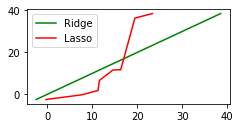

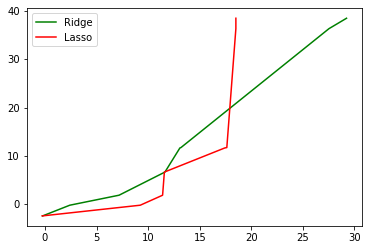

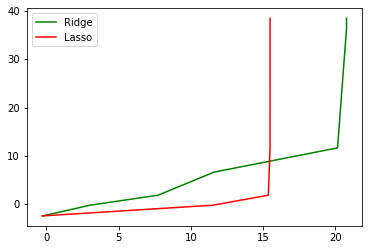

In [203]:
fig = plt.figure(figsize=(8,8))
j = 1

for i,lamda in enumerate(lamda_list):
    fig.add_subplot(4, 2, j)
    j+=1
    
    for reg_type in ['ridge', 'lasso']:
        Y_hat, mse, reg = regression(X_train.reshape(-1,1),y_train,reg_type = reg_type, alpha=lamda)
        Y_hat = np.sort(Y_hat)
        y_train = np.sort(y_train)
        if reg_type == 'ridge':
            plt.plot(Y_hat, y_train, label = 'Ridge', color = 'green')
        elif reg_type == 'lasso':
            plt.plot(Y_hat, y_train, label = 'Lasso', color = 'red')
            
    plt.legend()
    plt.show()

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

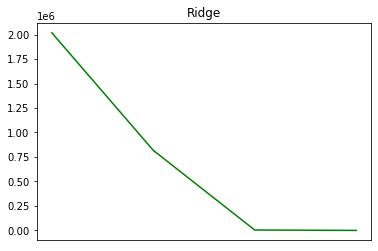

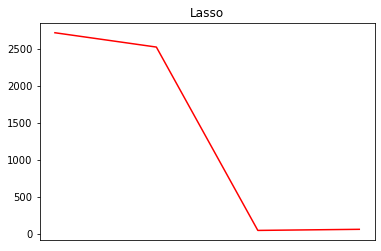

In [211]:
# write your code here
lamda_list = [0,1,10**5, 10**10]

mse_r = []
mse_l = []

for reg_type in ['ridge', 'lasso']:
    for i,lamda in enumerate(lamda_list):
        Y_hat, mse, reg = regression(X_train.reshape(-1,1),y_train,reg_type = reg_type, alpha=lamda)
        X_test_deg = PolynomialFeatures(degree, include_bias = False).fit_transform(X_test.reshape(-1,1))
        y_test_pred = reg.predict(X_test_deg)
        mse = mean_squared_error(y_test_pred, y_test)
        if reg_type == 'ridge':
            mse_r.append(mse)
        if reg_type == 'lasso':
            mse_l.append(mse)
            
    if reg_type == 'ridge':
        plt.figure(1)
        plt.plot(mse_r, label = 'Ridge', color = 'green')
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        plt.title('Ridge')
    if reg_type == 'lasso':
        plt.figure(2)
        plt.plot(mse_l, label = 'Lasso', color = 'red')
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        plt.title('Lasso')
plt.show()

### Questions and Observations

- **What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?**

Ans: Without regularization, the curve overfits mainly because the true values for fit are missing making it want to satisfy each and every point.


-  **As value of lambda increases what happens to the model complexity?**

Ans: Model complexity decreases as the lambda increase makes the theta estimator go outside control making the more coefficients go to zero.

- **What can be infered from the mean squared error versus lambda?**

Ans: Mean squared error increases with lambda. We can infer that the error increases with higher lambda which also leads to the previous statement mentioned above.

- **Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)**

Ans: True because regularization controls the values of coefficients for the curve of the model. Also lets us control the number of iterations for fitting the curve, making it easier to manipulate to get the best results.

- **Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?**

Ans: Training error increases with lambda, validation error decreases with lambda
